<a href="https://colab.research.google.com/github/Pria91/Machine-Learning-Projects-/blob/main/Supervised_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***PREDICTIVE ANALYSIS EXCERCISE***


***Let's import all libraries required in this project*** 


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

***Let's read the data from input file***

In [ ]:
data = pd.read_csv("ScoresData.csv")

***OR, read it from a remote file***

In [ ]:
#Read data from remote link
url ="http://bit.ly/w-data"
data = pd.read_csv(url)

In [ ]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


***Let's explore the data***

In [ ]:
data.dtypes 

Hours     float64
Scores      int64
dtype: object

In [ ]:
#Total number of rows and columns 
data.shape

(25, 2)

***Let's look at the statistical details***

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


***Let's check for Null values, if any***

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

***Let's explore and analyse this data***

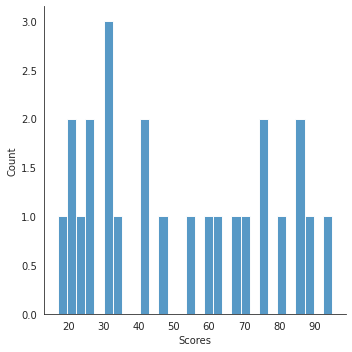

In [ ]:
sns.set_style('white')
sns.displot(data['Scores'], kde = False, bins = 30)

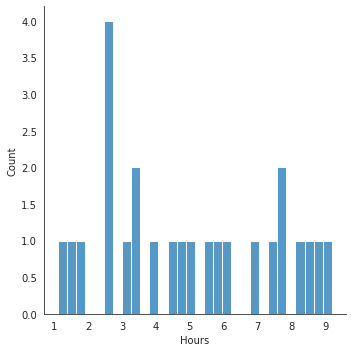

In [ ]:
sns.set_style('white')
sns.displot(data['Hours'], kde = False, bins = 30)

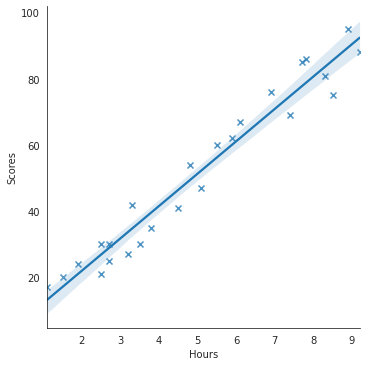

In [ ]:
sns.lmplot(x='Hours', y='Scores', data = data,  markers=["x"], palette="Set2")

**From the graph below, we can say that there is a positive relationship between Hours Studied and Percentage Score**

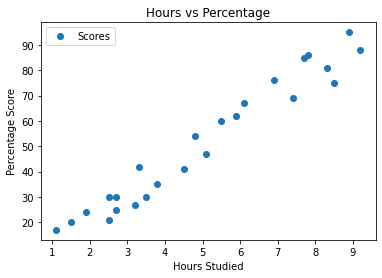

In [ ]:
#Plot the distribution of scores
data.plot(x="Hours",y="Scores",style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

***Now, Let's prepare the Model to make the prediction that we are after!***

In [ ]:
#Assigning the dependent and independent variable 
#Divide the data into attributes(inputs) and labels(output)

x1 = data.iloc[:,:-1].values
y1 = data.iloc[:,1].values

X = x1.reshape(-1,1)
y = y1.reshape(-1,1)

In [ ]:
#Dividing the test and train values in 20:80 size respectively 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
#Creating and Training the model 
from sklearn.linear_model import LinearRegression


#Creating the model 
regressor = LinearRegression()


#Training the model 
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

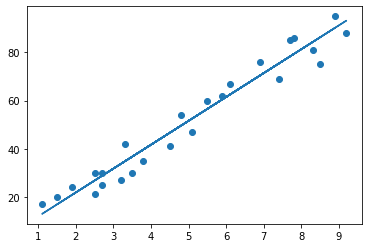

In [ ]:
#Creating a line from fitting model
#Plot the Regression Line and for the test dataset

line = regressor.coef_*X+regressor.intercept_

#Plots
plt.scatter(X,y)               #same as x vs y plot from data file 
plt.plot(X,line)
plt.show()

***Let's check the prediction of known values***

In [ ]:
#Testing data in hours
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
#Predicting the scores
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [ ]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

Text(0, 0.5, 'PREDICTED Y')

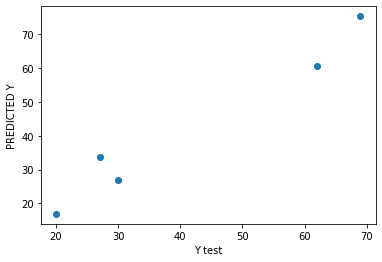

In [ ]:
#Actual test value vs the predicted value 

plt.scatter(y_test, y_pred)
plt.xlabel('Y test')
plt.ylabel('PREDICTED Y')

***Evaluation of Model***

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Square Error: 21.598769307217456
Root Mean Square Error: 4.647447612100373


In [ ]:
#variance of model 

metrics.explained_variance_score(y_test, y_pred)

0.9482829156738145

In [ ]:
#Accuracy of model 
from sklearn import metrics
metrics.r2_score(y_test,y_pred)       #Goodness of fit Test

0.9454906892105354

***Above 94% indicates that the fitted model is a Good Model***

***Now, Let's make our final prediction***

In [ ]:
predicting_score = regressor.predict([[9.25]])
predicting_score

array([[93.69173249]])

***CONCLUSION - From the above we can say that if a student studied for 9.25 hours then the student will secure 93.69 marks.***

In [ ]:
#If the student studies 9.25 hours/day, then what will be the score ? 

hours = np.array(9.25)

hours = hours.reshape(-1,1)

answer = lmodel.predict(hours)

print("If the student studies 9.25 hours/day, then the score will be:", answer)

If the student studies 9.25 hours/day, then the score will be: [[93.43229054]]


***Why did we do this ? Was there any easy Math to do it?***

In [ ]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
Scores = data['Scores']
Scores

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [ ]:
Hours = data['Hours']
Hours

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [ ]:
final = (Scores/Hours)*9.25
final 

0      77.700000
1      85.245098
2      78.046875
3      81.617647
4      79.285714
5     123.333333
6      88.478261
7     100.909091
8      90.271084
9      85.648148
10    102.110390
11     97.203390
12     84.277778
13    117.727273
14    142.954545
15     98.735955
16    111.000000
17    116.842105
18    101.598361
19     86.250000
20    102.777778
21    104.062500
22     85.197368
23    101.884058
24    101.987179
dtype: float64

In [ ]:
sum = final.sum()
sum

2445.1439320138347

In [ ]:
average = sum/25
average

97.8057572805534

***The answer is No! Easy Math makes a prediction, Not as good as Regression Analysis***